In [2]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import db_dtypes
import bigframes.pandas as bpd
from IPython.display import display, HTML
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from datetime import datetime
from typing import Union
import logging
import sys
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

test_data = """

SELECT dto.test_id
       ,dto.entity_id
       ,dto.created_date
       ,order_day
       ,order_hour
       ,vendor_id
       ,vendor_vertical_parent
       ,platform_order_code
       ,is_sent
       ,is_own_delivery
       ,is_pickup
       ,customer_id
       ,dps_session_id
       ,test_variant
       ,is_in_treatment
       ,dps_basket_value_local
       ,dps_basket_value_eur
       ,gmv_local
       ,gmv_eur
       ,gfv_local
       ,gfv_eur
       ,discount_dh_local
       ,discount_dh_eur
       ,voucher_dh_local
       ,voucher_dh_eur
       ,revenue_local
       ,revenue_eur
       ,profit_local
       ,profit_eur
       ,delivery_costs_local
       ,delivery_costs_eur
       ,fully_loaded_gross_profit_local
       ,fully_loaded_gross_profit_eur
FROM `fulfillment-dwh-production.cl.dps_test_orders` dto
WHERE dto.test_id = 451
  AND dto.entity_id = 'HS_SA'
  AND is_sent


"""

project_id = "logistics-customer-staging"

try:
    logging.info(f"Initializing BigQuery client for project: {project_id}")
    client = bigquery.Client(project=project_id)
except Exception as e:
    logging.error(f"Failed to initialize BigQuery client: {e}")
    sys.exit(1)


/Users/shazeb.asad/global_pricing/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [6]:
test_df = client.query(test_data).to_dataframe()

In [12]:
test_df.groupby('test_variant')['voucher_dh_eur'].sum()

test_variant
Control       120098.020000000
Variation1    117280.860000000
Name: voucher_dh_eur, dtype: object

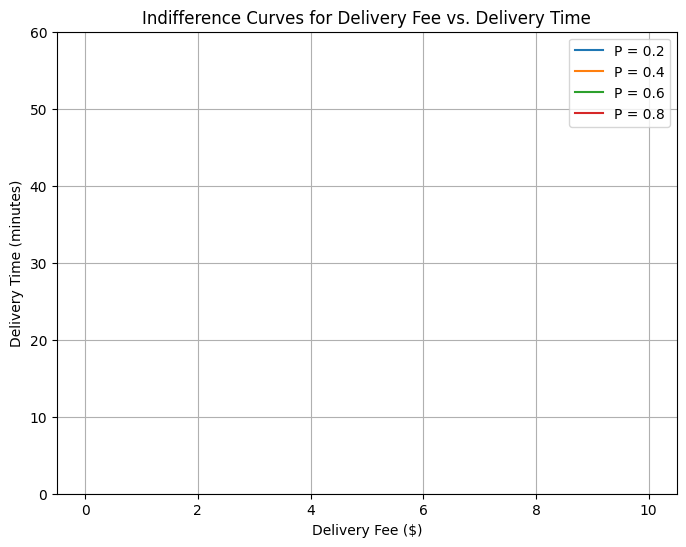

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define estimated model coefficients (Example values)
alpha = -2.0    # Intercept
beta = -0.5     # Delivery Fee Sensitivity
delta = -0.2    # Delivery Time Sensitivity
theta = 0.05    # Interaction term (Fee × Time)

# Define probability levels for indifference curves
probabilities = [0.2, 0.4, 0.6, 0.8]  # Different levels of willingness to convert

# Define range of delivery fees
fee_range = np.linspace(0, 10, 100)  # Fee from $0 to $10

# Compute indifference curves
plt.figure(figsize=(8, 6))
for p in probabilities:
    C = np.log(p / (1 - p))  # Convert probability to log-odds scale
    time_values = (-beta / delta) * fee_range - (theta / delta) * (fee_range ** 2) + (C - alpha) / delta
    plt.plot(fee_range, time_values, label=f"P = {p}")

# Plot Formatting
plt.xlabel("Delivery Fee ($)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Indifference Curves for Delivery Fee vs. Delivery Time")
plt.legend()
plt.grid()
plt.ylim(0, 60)  # Limit to realistic delivery times
plt.show()